# Project: YouTube Channel Performance Analyzer

## Tech stack used: 
* Python,
* Data Analysis (Numpy, Pandas)
* Data Visualization(Matplotlib, Seaborn)
* Exploratory data Analyis
* Feature Engineering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cmt_df = pd.read_csv('comments.csv')
cmt_df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [3]:
vid_df = pd.read_csv('videos-stats.csv')
vid_df.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [4]:
df = pd.concat([cmt_df,vid_df])
df

,Unnamed: 0,Video ID,Comment,Likes,Sentiment,Title,Published At,Keyword,Comments,Views
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,NaN,NaN,NaN,NaN,NaN
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1876,1876,AO6urf07KjE,NaN,10259.0,NaN,Should You Learn Machine Learning?,2021-06-14,machine learning,416.0,386360.0
1877,1877,7ClLKBUvmRk,NaN,2981.0,NaN,Todos podemos aprender Machine learning,2017-10-08,machine learning,72.0,431421.0
1878,1878,0jspaMLxBig,NaN,5198.0,NaN,"Andrew Ng: Deep Learning, Education, and Real-...",2020-02-20,machine learning,443.0,226152.0
1879,1879,f_uwKZIAeM0,NaN,NaN,NaN,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20290 entries, 0 to 1880
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20290 non-null  int64  
 1   Video ID      20290 non-null  object 
 2   Comment       18408 non-null  object 
 3   Likes         20288 non-null  float64
 4   Sentiment     18409 non-null  float64
 5   Title         1881 non-null   object 
 6   Published At  1881 non-null   object 
 7   Keyword       1881 non-null   object 
 8   Comments      1879 non-null   float64
 9   Views         1879 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
Video ID            0
Comment          1882
Likes               2
Sentiment        1881
Title           18409
Published At    18409
Keyword         18409
Comments        18411
Views           18411
dtype: int64

In [7]:
# Observation:
# to drop an unnecessary column - "Unnamed: 0".
# to drop an unnecessary column - "Comments".
# except for column "video id and unnamed", every column has many null values.
# replacing NaN values with 0.
# to change the datatype of "likes and sentiments" to int from float.

#### Dropping the unnecessary column - "Unnamed: 0":

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,Video ID,Comment,Likes,Sentiment,Title,Published At,Keyword,Comments,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,NaN,NaN,NaN,NaN,NaN
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,NaN,NaN,NaN,NaN,NaN
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,NaN,NaN,NaN,NaN,NaN


### Dropping the unnecessary column - "Comments":

In [9]:
df.drop('Comments', axis=1, inplace=True)
df.head(3)

,Video ID,Comment,Likes,Sentiment,Title,Published At,Keyword,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,NaN,NaN,NaN,NaN
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,NaN,NaN,NaN,NaN
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,NaN,NaN,NaN,NaN


### Dropping the unnecessary column - "Sentiment":

In [10]:
df['Sentiment']

0       1.0
1       0.0
2       2.0
3       0.0
4       2.0
       ... 
1876    NaN
1877    NaN
1878    NaN
1879    NaN
1880    NaN
Name: Sentiment, Length: 20290, dtype: float64

In [11]:
df.drop('Sentiment', axis=1, inplace = True)
df.head()

,Video ID,Comment,Likes,Title,Published At,Keyword,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,NaN,NaN,NaN,NaN
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,NaN,NaN,NaN,NaN
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,NaN,NaN,NaN,NaN
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,NaN,NaN,NaN,NaN
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,NaN,NaN,NaN,NaN


### Changing datatype of "Likes":

In [12]:
df['Likes'].unique()

array([  95.,   19.,  161., ..., 2981., 5198.,   nan])

In [13]:
df['Likes'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1876    False
1877    False
1878    False
1879     True
1880     True
Name: Likes, Length: 20290, dtype: bool

In [14]:
df['Likes']=df['Likes'].fillna(0).astype(int)

In [15]:
df['Likes']

0          95
1          19
2         161
3           8
4          34
        ...  
1876    10259
1877     2981
1878     5198
1879        0
1880        0
Name: Likes, Length: 20290, dtype: int64

In [16]:
df['Likes'].isnull().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20290 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Video ID      20290 non-null  object 
 1   Comment       18408 non-null  object 
 2   Likes         20290 non-null  int64  
 3   Title         1881 non-null   object 
 4   Published At  1881 non-null   object 
 5   Keyword       1881 non-null   object 
 6   Views         1879 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


### Removing null values from "Title" and "keyword":

In [18]:
df['Title'].isnull().sum()

np.int64(18409)

In [19]:
df['Title'].unique()

array([nan,
       'Apple Pay Is Killing the Physical Wallet After Only Eight Years | Tech News Briefing Podcast | WSJ',
       'The most EXPENSIVE thing I own.', ...,
       'Todos podemos aprender Machine learning',
       'Andrew Ng: Deep Learning, Education, and Real-World AI | Lex Fridman Podcast #73',
       'Don&#39;t learn machine learning'], dtype=object)

In [20]:
df['Title']=df['Title'].fillna(0)
df['Title']

0                                                       0
1                                                       0
2                                                       0
3                                                       0
4                                                       0
                              ...                        
1876                   Should You Learn Machine Learning?
1877              Todos podemos aprender Machine learning
1878    Andrew Ng: Deep Learning, Education, and Real-...
1879                            What is Machine Learning?
1880                     Don&#39;t learn machine learning
Name: Title, Length: 20290, dtype: object

In [21]:
df['Keyword'].isnull().sum()

np.int64(18409)

In [22]:
df['Keyword'].unique()

array([nan, 'tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'apple',
       'google', 'interview', 'history', 'literature', 'bed', 'trolling',
       'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals',
       'education', 'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry',
       'biology', 'physics', 'computer science', 'nintendo', 'xbox',
       'marvel', 'movies', 'data science', 'game development',
       'machine learning'], dtype=object)

In [23]:
df['Keyword']=df['Keyword'].fillna(0)
df['Keyword']

0                      0
1                      0
2                      0
3                      0
4                      0
              ...       
1876    machine learning
1877    machine learning
1878    machine learning
1879    machine learning
1880    machine learning
Name: Keyword, Length: 20290, dtype: object

In [24]:
df

,Video ID,Comment,Likes,Title,Published At,Keyword,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,0,NaN,0,NaN
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,NaN,0,NaN
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,0,NaN,0,NaN
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,NaN,0,NaN
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,0,NaN,0,NaN
...,...,...,...,...,...,...,...
1876,AO6urf07KjE,NaN,10259,Should You Learn Machine Learning?,2021-06-14,machine learning,386360.0
1877,7ClLKBUvmRk,NaN,2981,Todos podemos aprender Machine learning,2017-10-08,machine learning,431421.0
1878,0jspaMLxBig,NaN,5198,"Andrew Ng: Deep Learning, Education, and Real-...",2020-02-20,machine learning,226152.0
1879,f_uwKZIAeM0,NaN,0,What is Machine Learning?,2017-01-11,machine learning,NaN


### Removing null values from "Comment", "Published at" and "Views"

In [25]:
df.isnull().sum()

Video ID            0
Comment          1882
Likes               0
Title               0
Published At    18409
Keyword             0
Views           18411
dtype: int64

In [26]:
df['Comment']=df['Comment'].fillna(0)
df['Comment']

0       Let's not forget that Apple Pay in 2014 requir...
1       Here in NZ 50% of retailers don’t even have co...
2       I will forever acknowledge this channel with t...
3       Whenever I go to a place that doesn’t take App...
4       Apple Pay is so convenient, secure, and easy t...
                              ...                        
1876                                                    0
1877                                                    0
1878                                                    0
1879                                                    0
1880                                                    0
Name: Comment, Length: 20290, dtype: object

In [27]:
df['Published At']=df['Published At'].fillna(0)
df['Published At']

0                0
1                0
2                0
3                0
4                0
           ...    
1876    2021-06-14
1877    2017-10-08
1878    2020-02-20
1879    2017-01-11
1880    2020-03-30
Name: Published At, Length: 20290, dtype: object

In [28]:
df['Views']=df['Views'].fillna(0).astype(int)
df['Views']

0            0
1            0
2            0
3            0
4            0
         ...  
1876    386360
1877    431421
1878    226152
1879         0
1880         0
Name: Views, Length: 20290, dtype: int64

In [29]:
df

,Video ID,Comment,Likes,Title,Published At,Keyword,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,0,0,0,0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,0,0,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,0,0,0,0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,0,0,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,0,0,0,0
...,...,...,...,...,...,...,...
1876,AO6urf07KjE,0,10259,Should You Learn Machine Learning?,2021-06-14,machine learning,386360
1877,7ClLKBUvmRk,0,2981,Todos podemos aprender Machine learning,2017-10-08,machine learning,431421
1878,0jspaMLxBig,0,5198,"Andrew Ng: Deep Learning, Education, and Real-...",2020-02-20,machine learning,226152
1879,f_uwKZIAeM0,0,0,What is Machine Learning?,2017-01-11,machine learning,0


# Observation:
* dropped 3 columns: ("Unnamed: 0", "Comments", "Sentiment")
* Removed all the null values from the dataset.
~ "Comment", "Likes", "Views", "Keyword", "Title", "Published at"
* changed the datatype of ("likes", "Views")

In [30]:
df['Published At'].unique()

array([0, '2022-08-23', '2022-08-24', '2022-08-08', '2021-11-05',
       '2022-06-13', '2022-08-07', '2021-12-08', '2022-07-14',
       '2022-08-15', '2022-08-06', '2022-08-13', '2021-12-15',
       '2022-07-09', '2021-06-04', '2021-08-13', '2022-07-21',
       '2022-08-14', '2022-03-25', '2022-05-12', '2022-07-02',
       '2021-06-18', '2022-07-31', '2022-08-10', '2022-05-27',
       '2022-06-03', '2022-08-19', '2021-11-30', '2022-05-28',
       '2022-04-02', '2022-05-14', '2022-05-05', '2022-01-07',
       '2022-03-16', '2022-07-23', '2022-06-04', '2021-12-04',
       '2022-08-04', '2022-05-26', '2022-07-30', '2022-06-08',
       '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-18',
       '2022-01-18', '2020-11-14', '2022-05-06', '2022-03-31',
       '2018-01-09', '2022-07-24', '2022-04-18', '2019-04-22',
       '2021-06-20', '2019-12-22', '2021-08-06', '2021-08-30',
       '2022-08-16', '2022-02-22', '2022-01-02', '2021-08-09',
       '2019-10-07', '2020-10-03', '2022-05-07', '20

In [34]:
# to show year
df['Published At'] = pd.to_datetime(df['Published At'])
df['Published At'].dtype

# df['Published At']=df['Published At'].dt.year
# df['Published At'].dtypes

dtype('<M8[ns]')

In [35]:
df.head()

,Video ID,Comment,Likes,Title,Published At,Keyword,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,0,1970-01-01,0,0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,1970-01-01,0,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,0,1970-01-01,0,0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,1970-01-01,0,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,0,1970-01-01,0,0


In [ ]:
df.drop('Year',axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df['Published At'].unique()

In [ ]:
df.info()

# Data Visualization:

### Which are the top 10 most-watched videos?

In [36]:
df['Views'].unique()

array([      0,  135612, 1758063, ...,  386360,  431421,  226152])

In [38]:
sns.set_style("darkgrid")

In [37]:
# Sort DataFrame by Views (Descending Order) & Select Top 10
df_top10 = df.sort_values(by="Views", ascending=False).head(10)

C:\Users\asus\AppData\Local\Temp\ipykernel_19104\3000163856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top10["Views"], y=df_top10["Video ID"], palette="Reds_r", legend=True);


Text(0.5, 1.0, 'Top 10 Most-Watched Videos')

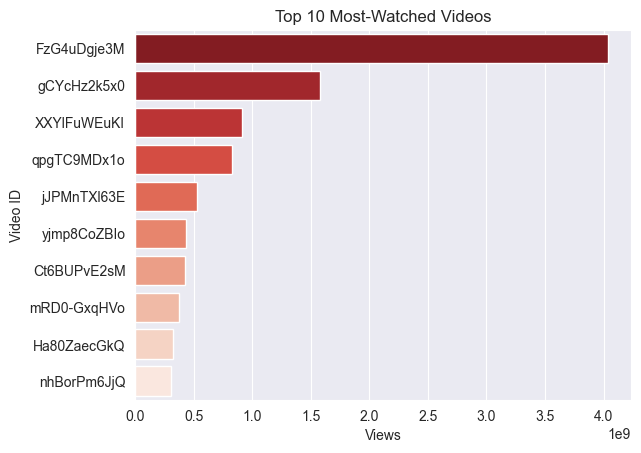

In [39]:
sns.barplot(x=df_top10["Views"], y=df_top10["Video ID"], palette="Reds_r", legend=True);
plt.title("Top 10 Most-Watched Videos")

In [40]:
df[df['Video ID']== "FzG4uDgje3M"]

,Video ID,Comment,Likes,Title,Published At,Keyword,Views
5360,FzG4uDgje3M,imagínate ser una generación tan de cristal qu...,7972,0,1970-01-01,0,0
5361,FzG4uDgje3M,He's a good dancer,3,0,1970-01-01,0,0
5362,FzG4uDgje3M,Whoever made this masterpiece really knows wha...,29,0,1970-01-01,0,0
5363,FzG4uDgje3M,J’adore 🥰 🥰🥰🥰🥰,0,0,1970-01-01,0,0
5364,FzG4uDgje3M,22/08/2022. Nostalgia de Respeito e Maravilhos...,8,0,1970-01-01,0,0
5365,FzG4uDgje3M,0:01 melhor parte kk,18,0,1970-01-01,0,0
5366,FzG4uDgje3M,I listened to this before and now I’m listenin...,9,0,1970-01-01,0,0
5367,FzG4uDgje3M,Really Enjoyed it!,14,0,1970-01-01,0,0
5368,FzG4uDgje3M,Young people at 2022:Again this song!\nPeople ...,17,0,1970-01-01,0,0
5369,FzG4uDgje3M,i remember when this first came out and i kept...,7,0,1970-01-01,0,0


### Observation:
"EI Chombo - Dame Tu Cosita feat. Cutty Ranks" == is the most watched videos

### Which keywords appear most in highly engaged videos?

In [41]:
df['Keyword'].unique()

array([0, 'tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'apple',
       'google', 'interview', 'history', 'literature', 'bed', 'trolling',
       'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals',
       'education', 'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry',
       'biology', 'physics', 'computer science', 'nintendo', 'xbox',
       'marvel', 'movies', 'data science', 'game development',
       'machine learning'], dtype=object)

C:\Users\asus\AppData\Local\Temp\ipykernel_19104\2610181386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y="Keyword", order=top_df.index, palette="magma")


<Figure size 1200x600 with 0 Axes>

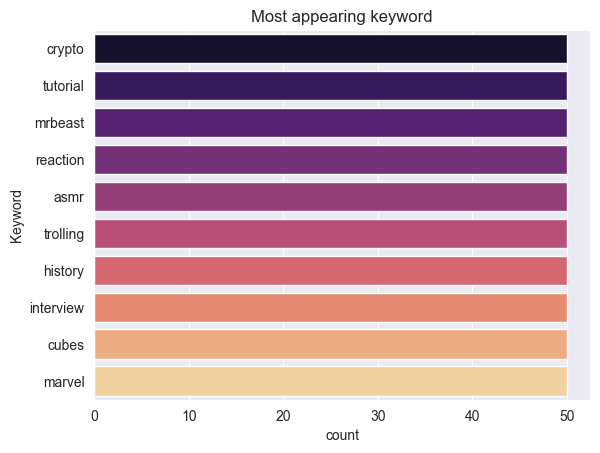

<Figure size 1200x600 with 0 Axes>

In [42]:
df = df[df["Keyword"] != 0]
top_df = df["Keyword"].value_counts().head(10)
filtered_df = df[df["Keyword"].isin(top_df.index)]
sns.countplot(data=filtered_df, y="Keyword", order=top_df.index, palette="magma")
# sns.barplot(x='Keyword', y='Video ID', data=df, hue='Keyword',legend=False, palette="magma");
plt.title("Most appearing keyword")
plt.figure(figsize=(12, 6))


### Observation:
"Crypto" == Most appearing keyword.

In [43]:
df['Published At'].unique()

<DatetimeArray>
['2022-08-23 00:00:00', '2022-08-24 00:00:00', '2022-08-08 00:00:00',
 '2021-11-05 00:00:00', '2022-06-13 00:00:00', '2022-08-07 00:00:00',
 '2021-12-08 00:00:00', '2022-07-14 00:00:00', '2022-08-15 00:00:00',
 '2022-08-06 00:00:00',
 ...
 '2018-02-22 00:00:00', '2021-02-12 00:00:00', '2019-06-03 00:00:00',
 '2018-12-19 00:00:00', '2018-02-13 00:00:00', '2021-05-11 00:00:00',
 '2021-06-14 00:00:00', '2017-10-08 00:00:00', '2020-02-20 00:00:00',
 '2020-03-30 00:00:00']
Length: 757, dtype: datetime64[ns]

### Since the column "Published At" includes both date and time. so we have to seperate them

In [47]:
df.loc[:, 'Date'] = df['Published At'].dt.date
df.loc[:, 'Time'] = df['Published At'].dt.time
print(df[['Published At', 'Date', 'Time']].head())

  Published At        Date      Time
0   2022-08-23  2022-08-23  00:00:00
1   2022-08-24  2022-08-24  00:00:00
2   2022-08-23  2022-08-23  00:00:00
3   2022-08-23  2022-08-23  00:00:00
4   2022-08-08  2022-08-08  00:00:00


In [48]:
df

,Video ID,Comment,Likes,Title,Published At,Keyword,Views,Date,Time
0,wAZZ-UWGVHI,0,3407,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,135612,2022-08-23,00:00:00
1,b3x28s61q3c,0,76779,The most EXPENSIVE thing I own.,2022-08-24,tech,1758063,2022-08-24,00:00:00
2,4mgePWWCAmA,0,63825,My New House Gaming Setup is SICK!,2022-08-23,tech,1564007,2022-08-23,00:00:00
3,kXiYSI7H2b0,0,71566,Petrol Vs Liquid Nitrogen | Freezing Experimen...,2022-08-23,tech,922918,2022-08-23,00:00:00
4,ErMwWXQxHp0,0,96513,Best Back to School Tech 2022!,2022-08-08,tech,1855644,2022-08-08,00:00:00
...,...,...,...,...,...,...,...,...,...
1876,AO6urf07KjE,0,10259,Should You Learn Machine Learning?,2021-06-14,machine learning,386360,2021-06-14,00:00:00
1877,7ClLKBUvmRk,0,2981,Todos podemos aprender Machine learning,2017-10-08,machine learning,431421,2017-10-08,00:00:00
1878,0jspaMLxBig,0,5198,"Andrew Ng: Deep Learning, Education, and Real-...",2020-02-20,machine learning,226152,2020-02-20,00:00:00
1879,f_uwKZIAeM0,0,0,What is Machine Learning?,2017-01-11,machine learning,0,2017-01-11,00:00:00


In [ ]:
df['Date'].unique()

In [51]:
df['Time'].unique()

array([datetime.time(0, 0)], dtype=object)

### Seperating "date" into date, month , year column

In [60]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df.loc[:, 'Day'] = df['Date'].dt.day.astype('Int64')  # Extract Day
df.loc[:, 'Month'] = df['Date'].dt.month.astype('Int64')  # Extract Month
df.loc[:, 'Year'] = df['Date'].dt.year.astype('Int64')  # Extract Year

In [61]:
df

,Video ID,Comment,Likes,Title,Published At,Keyword,Views,Date,Time,Day,Month,Year
0,wAZZ-UWGVHI,0,3407,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,135612,2022-08-23,00:00:00,23,8,2022
1,b3x28s61q3c,0,76779,The most EXPENSIVE thing I own.,2022-08-24,tech,1758063,2022-08-24,00:00:00,24,8,2022
2,4mgePWWCAmA,0,63825,My New House Gaming Setup is SICK!,2022-08-23,tech,1564007,2022-08-23,00:00:00,23,8,2022
3,kXiYSI7H2b0,0,71566,Petrol Vs Liquid Nitrogen | Freezing Experimen...,2022-08-23,tech,922918,2022-08-23,00:00:00,23,8,2022
4,ErMwWXQxHp0,0,96513,Best Back to School Tech 2022!,2022-08-08,tech,1855644,2022-08-08,00:00:00,8,8,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,AO6urf07KjE,0,10259,Should You Learn Machine Learning?,2021-06-14,machine learning,386360,2021-06-14,00:00:00,14,6,2021
1877,7ClLKBUvmRk,0,2981,Todos podemos aprender Machine learning,2017-10-08,machine learning,431421,2017-10-08,00:00:00,8,10,2017
1878,0jspaMLxBig,0,5198,"Andrew Ng: Deep Learning, Education, and Real-...",2020-02-20,machine learning,226152,2020-02-20,00:00:00,20,2,2020
1879,f_uwKZIAeM0,0,0,What is Machine Learning?,2017-01-11,machine learning,0,2017-01-11,00:00:00,11,1,2017


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1881 entries, 0 to 1880
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Video ID      1881 non-null   object        
 1   Comment       1881 non-null   object        
 2   Likes         1881 non-null   int64         
 3   Title         1881 non-null   object        
 4   Published At  1881 non-null   datetime64[ns]
 5   Keyword       1881 non-null   object        
 6   Views         1881 non-null   int64         
 7   Date          1881 non-null   datetime64[ns]
 8   Time          1881 non-null   object        
 9   Day           1881 non-null   Int64         
 10  Month         1881 non-null   Int64         
 11  Year          1881 non-null   Int64         
dtypes: Int64(3), datetime64[ns](2), int64(2), object(5)
memory usage: 196.5+ KB


### Dropping columns - "Published At", "Date":

In [ ]:
df.drop('Published At', axis=1, inplace=True)

In [66]:
df.drop('Date', axis=1, inplace = True)

In [68]:
df.head(3)

,Video ID,Comment,Likes,Title,Keyword,Views,Time,Day,Month,Year
0,wAZZ-UWGVHI,0,3407,Apple Pay Is Killing the Physical Wallet After...,tech,135612,00:00:00,23,8,2022
1,b3x28s61q3c,0,76779,The most EXPENSIVE thing I own.,tech,1758063,00:00:00,24,8,2022
2,4mgePWWCAmA,0,63825,My New House Gaming Setup is SICK!,tech,1564007,00:00:00,23,8,2022


In [85]:
df['Day']=df['Day'].fillna(0)
df['Day']

0       23
1       24
2       23
3       23
4        8
        ..
1876    14
1877     8
1878    20
1879    11
1880    30
Name: Day, Length: 1881, dtype: Int64

In [84]:
df['Month']=df['Month'].fillna(0)
df['Month']

0        8
1        8
2        8
3        8
4        8
        ..
1876     6
1877    10
1878     2
1879     1
1880     3
Name: Month, Length: 1881, dtype: Int64

In [82]:
df['Year']=df['Year'].fillna(0)
df['Year']

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1876    2021
1877    2017
1878    2020
1879    2017
1880    2020
Name: Year, Length: 1881, dtype: Int64

In [88]:
df_unique = df.drop_duplicates(subset=["Month", "Year"])
new_df = df_unique.pivot(index="Month", columns="Year", values="Video ID")

In [89]:
new_df

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,QnQe0xW_JY4,NaN,NaN,wvXDB9dMdEo,yBtMwyQFXwA,Q8ijKtdIRMQ,szeXkBYq5HU,xqAoloAGlCE,HG68Ymazo18,_6akkGVr2zs,-pTGc7cIBIA
2,NaN,NaN,h4UqMyldS7Q,NaN,NNnIGh9g6fA,H8WJ2KENlK0,NaN,MS4jk5kavy4,2Yt6raj-S1M,Lr6DYLBkyG0,n3kNlFMXslo,kmhvZ8kVdG4,_uQrJ0TkZlc,cq1rdB4Nu4o,MN7yfV4UuCI,jzJW0gTYB9k
3,NaN,NaN,NaN,gM7Hlg75Mlo,NaN,sQK3Yr4Sc_k,5MgBikgcWnY,NaN,URUJD5NEXC8,ZJy1ajvMU1k,TdJxY4w9XKY,ht5vd3wNw0Y,7S_tz1z_5bA,egGtItqv8ss,0Q7HCaKq-j4,nmY2kgWYwyQ
4,NaN,NaN,NaN,NaN,NaN,8kK2zwjRV0M,TlEpQgYBS0E,cjNJs5v0WEs,XLYqTZKEpvs,Nsbp0GQHOGc,ul1H_p_FeaA,FzG4uDgje3M,dwV04XuiWq4,nllDcnfoH5A,nZ7m5UDvfps,UK5OHUmIgcc
5,NaN,NaN,NaN,jKL2pdRmwc4,nhBorPm6JjQ,NaN,eREopphW5Bw,NaN,HndV87XpkWg,MMmSdxZpseY,iM_KMYulI_s,NaN,4jwUXV4QaTw,G18zAn2APsc,n2RNcPRtAiY,Q2ysbTVlPdk
6,NaN,NaN,NvR60Wg9R7Q,2IUZWZX4OGI,NaN,F38BmgPcZ_I,gCYcHz2k5x0,NaN,qv6UVOQ0F44,N9dB9BZWDBU,oarGRayak5o,La9oLLoI5Rc,dhLCzSwUTvc,1_r0mhnxGN0,N88OE2ZCHBM,jXf04bhcjbg
7,82t_UOMHPJY,MAe_w9a_IN8,4-43lLKaqBQ,NaN,NaN,NaN,NaN,IskEx0tgoo4,5jmN_tBS0t4,AnVBCyzNgaU,NaN,rfscVS0vtbw,KmOAznOQX-g,kkaF1pyhYAA,7oj6gpAbYgw,R7qsau3X6Ks
8,NaN,NaN,k6U-i4gXkLM,NaN,NaN,0NbBjNiw4tk,NaN,7BJ3ZXpserc,eNsVaUCzvLA,1SuHkY2wAQA,oSGld-eY7BM,QjL7D33xpS4,kh898pODd8s,115amzVdV44,PKATJiyz0iI,wAZZ-UWGVHI
9,NaN,NaN,NaN,_Ixip0K2r10,Q_ljNRC8qqM,NaN,NaN,4RCFLobfqcw,d1W7wqXD_b0,PFA-RmV_wG0,pBG10XnxQaI,RFDaxPoGA6U,R-R0KrXvWbc,nCg3ufihKyU,Kcne0vP4NNE,NaN


In [90]:
df.head()

,Video ID,Comment,Likes,Title,Keyword,Views,Time,Day,Month,Year
0,wAZZ-UWGVHI,0,3407,Apple Pay Is Killing the Physical Wallet After...,tech,135612,00:00:00,23,8,2022
1,b3x28s61q3c,0,76779,The most EXPENSIVE thing I own.,tech,1758063,00:00:00,24,8,2022
2,4mgePWWCAmA,0,63825,My New House Gaming Setup is SICK!,tech,1564007,00:00:00,23,8,2022
3,kXiYSI7H2b0,0,71566,Petrol Vs Liquid Nitrogen | Freezing Experimen...,tech,922918,00:00:00,23,8,2022
4,ErMwWXQxHp0,0,96513,Best Back to School Tech 2022!,tech,1855644,00:00:00,8,8,2022


In [93]:
df['Video ID'].value_counts()

Video ID
7eh4d6sabA0    2
96mrgd8-3yE    2
5q87K1WaoFI    2
2FYvHn12pOQ    2
RFMi3v0TXP8    2
              ..
wLlL46pYcg4    1
2TqOmtTAMRY    1
jXf04bhcjbg    1
18fwz9Itbvo    1
ErMwWXQxHp0    1
Name: count, Length: 1869, dtype: int64

In [95]:
df.drop_duplicates(subset=['Video ID'], inplace=True)

In [96]:
df.head()

,Video ID,Comment,Likes,Title,Keyword,Views,Time,Day,Month,Year
0,wAZZ-UWGVHI,0,3407,Apple Pay Is Killing the Physical Wallet After...,tech,135612,00:00:00,23,8,2022
1,b3x28s61q3c,0,76779,The most EXPENSIVE thing I own.,tech,1758063,00:00:00,24,8,2022
2,4mgePWWCAmA,0,63825,My New House Gaming Setup is SICK!,tech,1564007,00:00:00,23,8,2022
3,kXiYSI7H2b0,0,71566,Petrol Vs Liquid Nitrogen | Freezing Experimen...,tech,922918,00:00:00,23,8,2022
4,ErMwWXQxHp0,0,96513,Best Back to School Tech 2022!,tech,1855644,00:00:00,8,8,2022


In [97]:
df['Video ID'].value_counts()

Video ID
cyLWtMSry58    1
wAZZ-UWGVHI    1
b3x28s61q3c    1
4mgePWWCAmA    1
kXiYSI7H2b0    1
              ..
qiMnSaZWf3M    1
PKATJiyz0iI    1
N88OE2ZCHBM    1
eFhhW6fsAbQ    1
d-BdIo8_wpA    1
Name: count, Length: 1869, dtype: int64

## Summary:
* dropped 3 columns: ("Unnamed: 0", "Comments", "Sentiment")
* Removed all the null values from the dataset.
~ "Comment", "Likes", "Views", "Keyword", "Title", "Published at"
* changed the datatype of ("likes", "Views")
* Seperated Published At column into - Date, Month, Year, Time
* Removed Published At and Date column.
  
## Data Visualization on:
* Which are the top 10 most watched Videos.
  -- Ans: Top1 : "EI Chombo - Dame Tu Cosita feat. Cutty Ranks" == is the most watched video.
* Which keywords appear most in highly engaged videos?
  -- Ans: Crypto.